<h1 style="text-align:center;font-family:'Times New Roman';">Simple Linear Regression</h1>

<h3 style="text-align:center;  font-family:'Times New Roman';">Import frameworks</h3>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

<h3 style="text-align:center;  font-family:'Times New Roman';">Load and clean data</h3>


In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
193,6.2,8,16.6,382
114,3.0,6,9.3,214
282,3.6,6,14.4,230
35,6.3,12,15.7,361
52,4.2,8,13.3,306
889,3.4,6,10.4,239
815,1.6,4,8.0,184
506,5.0,8,13.2,304
81,2.0,4,8.4,193


<h3 style="text-align:center;  font-family:'Times New Roman';">Visualize features</h3>


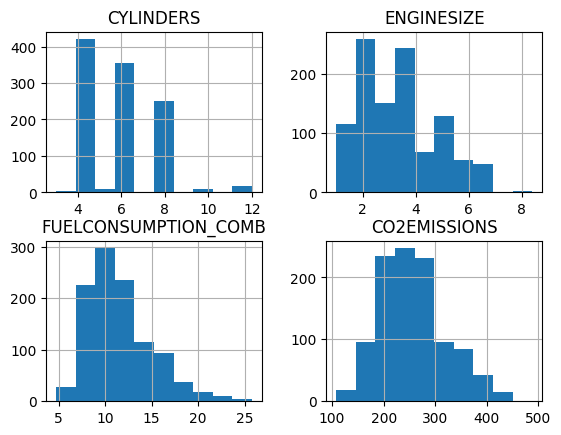

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

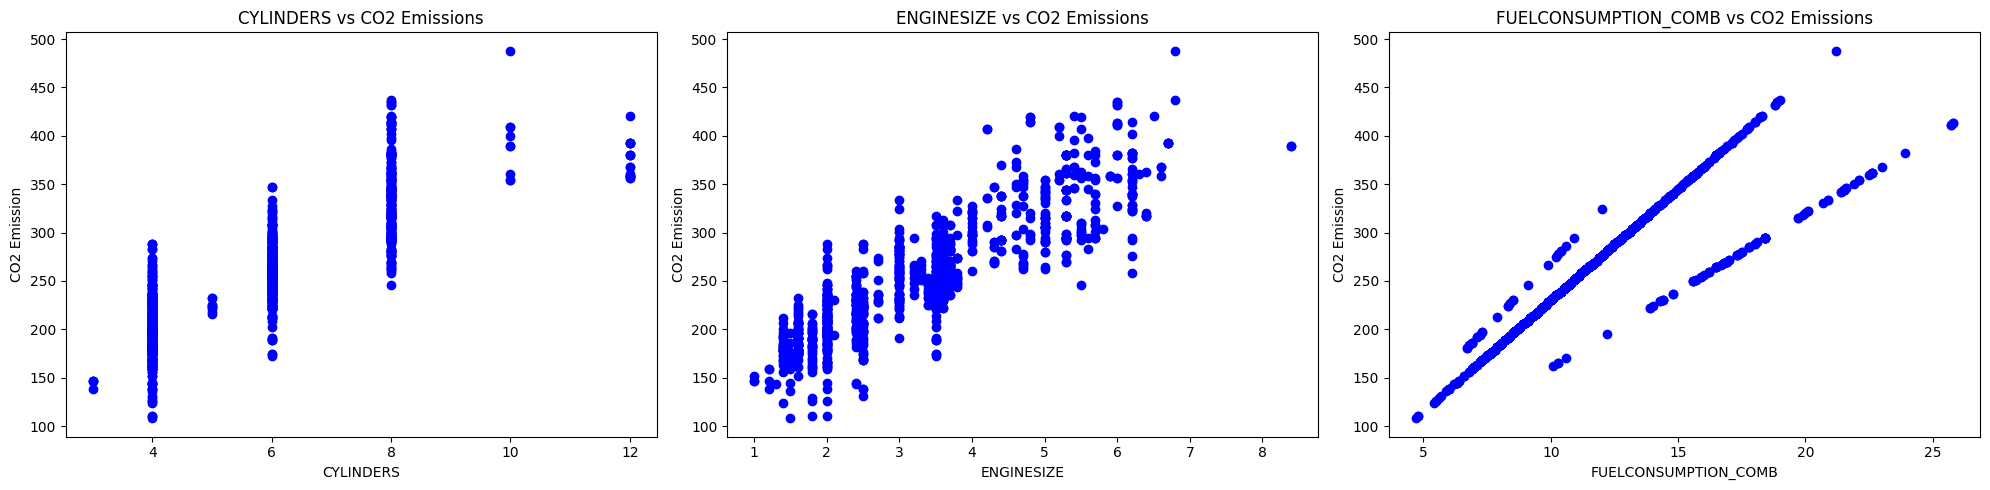

In [16]:
feature = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']]
plt.figure(figsize=(20, 5))

for i, feature in enumerate(feature, 1):
    plt.subplot(1, 3, i)
    plt.scatter(cdf[feature], cdf['CO2EMISSIONS'], color='blue')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emission')
    plt.title(f'{feature} vs CO2 Emissions')

plt.tight_layout()
plt.show()


<h5 style="text-align:left;  font-family:'Times New Roman';">The strongest linear relationship is between FUELCONSUMPTION_COMB and CO2EMISSIONS, so we will use it to train the model.</h5>



In [32]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [33]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [34]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  16.18090078119919
Intercept:  69.10302617988452


Text(0, 0.5, 'CO2 Emission')

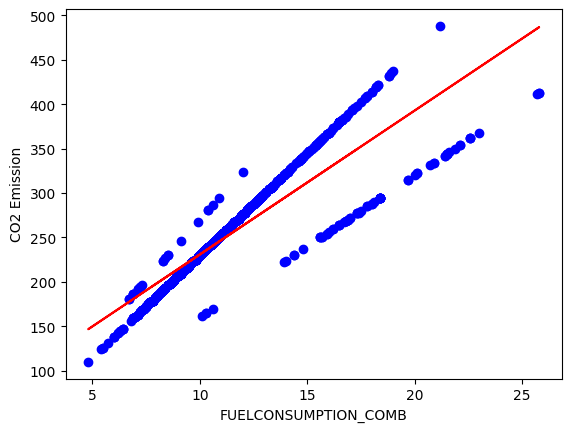

In [35]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81
